(480, 640)
(480, 640)
仿射变换矩阵:
[[ 1.09262829e+00  6.67107656e-03 -2.67582748e+00]
 [-6.67107656e-03  1.09262829e+00 -3.97703568e+01]]


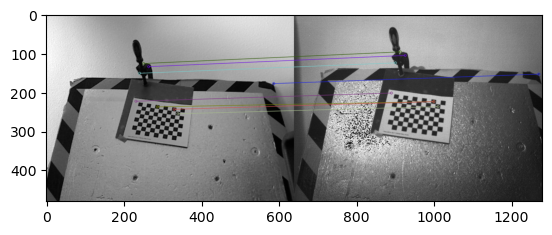

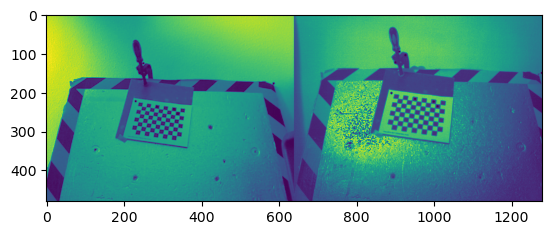

In [24]:
# 初始化SIFT检测器
import cv2
import numpy as np
import matplotlib.pyplot as plt

sift = cv2.SIFT_create()
img1 = cv2.imread('img/rgb_1.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('img/ir_1.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
print(img1.shape)
print(img2.shape)

# 寻找关键点和描述符
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# 初始化FLANN匹配器
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=4)
search_params = dict(checks=200)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# 使用KNN算法进行匹配
matches = flann.knnMatch(des1, des2, k=2)

# 进行比率测试，筛选出较好的匹配点对
good_matches = []
for m, n in matches:
    if m.distance < 0.3* n.distance:
        good_matches.append(m)

# 获取匹配点的坐标
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# 计算仿射变换矩阵
M, _ = cv2.estimateAffinePartial2D(src_pts, dst_pts)

# 打印输出仿射变换矩阵
print("仿射变换矩阵:")
print(M)

# 绘制匹配点
matches_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 显示匹配点图像
plt.imshow(matches_img)
plt.show()

# 进行比率测试，筛选出较好的匹配点对
good_matches = []
for m, n in matches:
    if m.distance < 0.3 * n.distance:
        good_matches.append(m)

# 获取匹配点的坐标
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)


# 使用仿射变换将第一张图像的特征点映射到第二张图像上
mapped_pts = cv2.transform(src_pts, M)
# 绘制映射后的特征点
for pt in mapped_pts:
    cv2.circle(img2, (int(pt[0][0]), int(pt[0][1])), 3, (0, 255, 0), -1)
for pt in src_pts:
    cv2.circle(img1, (int(pt[0][0]), int(pt[0][1])), 3, (0, 255, 0), -1)
# 将两幅图像合并成一张图像
combined_img = np.hstack((img1, img2))

# 显示合并后的图像
plt.imshow(combined_img)


In [48]:
bbox = (328, 200, 359, 231)

In [37]:
def convert_bbox_pct(bbox):
    x0,y0,x1,y1 = bbox
    src_pts = np.array([[x0,y0],[x0,y1],[x1,y1],[x1,y0]])
    return src_pts.reshape(-1,1,2)
def get_xyxy_from_pct(pct):
    pct = pct.reshape(-1,2)
    x0 = np.min(pct[:,0])
    x1 = np.max(pct[:,0])
    y0 = np.min(pct[:,1])
    y1 = np.max(pct[:,1])
    return (x0,y0,x1,y1)

In [38]:
src_pts = convert_bbox_pct(bbox)
print(src_pts)
bbox = get_xyxy_from_pct(src_pts)
print(bbox)

[[[328 200]]

 [[328 231]]

 [[359 231]]

 [[359 200]]]
(328, 200, 359, 231)


In [42]:
from utils import cali

In [51]:
pts_pnp = cv2.transform(src_pts,M)
bbox_pnp = get_xyxy_from_pct(pts_pnp)

[[357 176 391 210]]


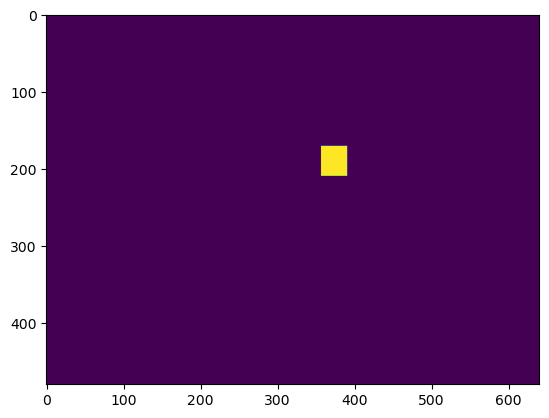

In [55]:
plt.imshow( cali.create_mask_from_bbox((480,640),np.array([bbox_pnp])) )

[[328 200 359 231]]


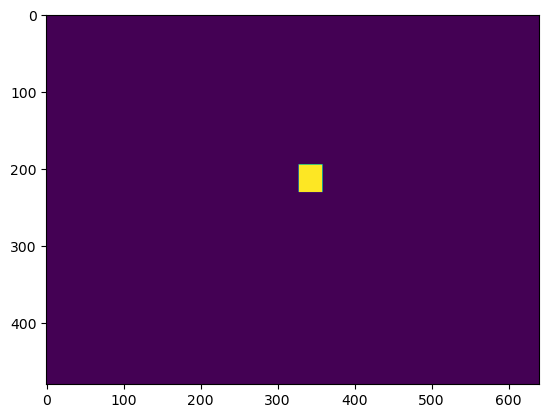

In [56]:
plt.imshow( cali.create_mask_from_bbox((480,640),np.array([bbox])) )

In [54]:
img1.shape

(480, 640)